# Project: TMDB movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
### Questions
<ol>
<li> Which genres are most popular from year to year ?
<li> What Keywords does people love about movies ?
<li> What kinds of properties are associated with movies that have high revenues ?
</ol>

Importing libraries with their traditional aliases<br>
`pandas` to work with Series and DataFrames as tables alias : `pd`<br> 
`numpy` to work with arrays and do heavy lifting math fast alias : `np`<br> 
`matplotlib.pyplot` to make visualizations showing graphs and histograms _ alias : `plt`<br> 
`seaborn` to stylize the graphs generated by matplotlib _alias : `sns`<br> 
`%matplotlib inline` to make the graphs show inline in the cell output not in an another window<br>
`set_style()` function to specify a specific style to visualizations 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Loading the data into the `df` variable using the `read_csv()` function and providing the path<br>
<span style="color:grey;font-size: 12px;">df short for `DataFrame` the class we are creating an object from</span><br>
Displaying the first 5 rows using the `.head()` method

In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Now to see what kind of data we have and to see of there are any duplicated rows <br>
Using the `.info()` method to see all the columns with their value type <br>
Using the `.duplicated()` method to generate a series of true/false values <br>
Using `.sum()` to see how many duplicated rows are there <br>

In [3]:
df.info()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

1

We can see that there are 21 columns and 10866 rows <br>
There are some columns with data we aren't going to use so we will drop them <br>
There are some missing values so we are going to have to drop them<br>
There are also 1 duplicated row so we are going to drop it <br>
release_date column is a string not datetime so we gonna have to convert it<br>

## Data Cleaning


There are 21 columns but we don't need all of them <br>
So we are going to remove the columns <strong style='color:red;'>id, imdb_id, homepage, tagline, overview </strong><br>
Using the `.drop()` method to remove and specifying the `axis=1` to specify the columns and `inplace=True` to change the original df<br>
Using the `.info()` method to see all the columns and to check if there are missing values

In [4]:
df.drop(['id','imdb_id','homepage','tagline','overview'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   keywords              9373 non-null   object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

As we can see there are missing values in the <strong style='color:red'>cast, director, keywords, genres, production_companies</strong> columns <br>
So We are going to delete it using the `.dropna()` method to delete null values and specifying `inplace=True` to change the original df<br>
And using the `.drop_duplicates()` method to delete any duplicated rows and specifying `inplace=True` to change the original df<br>
Using the `.info()` method to see all the columns and check if it's all the same

In [5]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8666 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            8666 non-null   float64
 1   budget                8666 non-null   int64  
 2   revenue               8666 non-null   int64  
 3   original_title        8666 non-null   object 
 4   cast                  8666 non-null   object 
 5   director              8666 non-null   object 
 6   keywords              8666 non-null   object 
 7   runtime               8666 non-null   int64  
 8   genres                8666 non-null   object 
 9   production_companies  8666 non-null   object 
 10  release_date          8666 non-null   object 
 11  vote_count            8666 non-null   int64  
 12  vote_average          8666 non-null   float64
 13  release_year          8666 non-null   int64  
 14  budget_adj            8666 non-null   float64
 15  revenue_adj         

Now before we move on to the questions . We noticed that release_date is an object not datetime so we must convert it to work with calculations<br>
First we use the `to_datetime()` function to convert the `release_date` column to datetime<br>
But we discovered an <strong style='color:red'>error that some dates exceed 2021 the current year</strong> that's because some of the original data weren't formatted well <br>
So we gonna use the `.apply()` method and check if the year exceeds 2021 then minus the year by 100 cause we know that the range of years 1960:2021<br>
(e.g. years in 2066 => 1966)<br>
### OR
We could have used the `release_year` column and made each year of the `release_date` column equal to that <br>
<br>
Finally using the `.tail()` method to print the last 5 values of the column and check for it was a success or not 


In [6]:
# importing the datetime class from the datetime module to make anew instance of it cause datetime is immutable
from datetime import datetime

# Made a function instead of using lambda to make it more readable
def release_date_to_datetime(x: datetime) -> datetime:
    """
    Transforms the wrong dates in the datetime column to the right dates
    Args:
        x:datetime object
    Returns:
        datetime after affect and making it right
    """
    if x.year > datetime.now().year:
        x = datetime(x.year-100, x.month, x.day)
    return x


print('Before : \n', df['release_date'].tail())
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'] = df['release_date'].apply(release_date_to_datetime)
print('\nAfter : \n', df['release_date'].tail())


Before : 
 10861     6/15/66
10862    12/21/66
10863      1/1/66
10864     11/2/66
10865    11/15/66
Name: release_date, dtype: object

After : 
 10861   1966-06-15
10862   1966-12-21
10863   1966-01-01
10864   1966-11-02
10865   1966-11-15
Name: release_date, dtype: datetime64[ns]


<a id='eda'></a>
## Exploratory Data Analysis



### Q1.Which genres are most popular from year to year ?

To answer this question we are going to first group by `release_year` then by the `genres` <br>
To do this we are going to make a copy of the `df` to split the rows that have multiple genres => multiple rows without affecting the original DataFrame<br>
Using `.str` attribute to access the value in it which is a string <br>
Using `.split('|')` method to split the genres into a list with multiple values <br>
Using the `.explode()` method to generate a DataFrame that there are no multiple values in the genres column<br>
(e.g.<br>
original_title&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;genres	<br>
Jurassic World&nbsp;&nbsp;&nbsp;&nbsp;Action|Adventure|Science Fiction<br>
=><br>
original_title&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;genres	<br>
Jurassic World&nbsp;&nbsp;&nbsp;&nbsp;Action<br>
Jurassic World&nbsp;&nbsp;&nbsp;&nbsp;Adventure<br>
Jurassic World&nbsp;&nbsp;&nbsp;&nbsp;Science Fiction<br>
) 

In [7]:
df_genre=df.copy()
df_genre['genres']=df_genre['genres'].str.split('|')
df_genre=df_genre.explode('genres')
df_genre.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


Now to grouping the data<br>
First we use the `.groupby()` method to group the data by a certain column <br>
Passing a list of `['release_year', 'genres']` into the groupby to group data by the specific columns <br>
Calling the `.mean()` method to generate a dataframe with the the average value of each column for each genre in each year<br>

In [8]:
mean_genre=df_genre.groupby(['release_year', 'genres']).mean()
mean_genre['popularity']

release_year  genres         
1960          Action             0.647264
              Adventure          0.700981
              Comedy             0.444597
              Crime              0.346479
              Drama              0.597252
                                   ...   
2015          Science Fiction    2.929048
              TV Movie           0.268283
              Thriller           1.835973
              War                1.686373
              Western            3.665047
Name: popularity, Length: 1029, dtype: float64

#### What are the most popular genre for each year?
After we have extracted the data we can now what is the most popular genre in each year<br>
Using the `.groupby()` method to group the data by the release_year then specifing the `['popularity']` column<br>
Then calling the `.idxmax()` method to find the index of the maximum popularity for each_year <br>
Then calling the `.values` attribute to get the array of data in the format `(release_year, most popular genre)` 

In [9]:
mean_genre.groupby('release_year')['popularity'].idxmax().values

array([(1960, 'Thriller'), (1961, 'Animation'), (1962, 'Adventure'),
       (1963, 'Animation'), (1964, 'War'), (1965, 'Music'),
       (1966, 'Animation'), (1967, 'Animation'), (1968, 'Mystery'),
       (1969, 'Crime'), (1970, 'Animation'), (1971, 'Family'),
       (1972, 'Crime'), (1973, 'Animation'), (1974, 'Mystery'),
       (1975, 'Romance'), (1976, 'Crime'), (1977, 'Science Fiction'),
       (1978, 'Music'), (1979, 'Action'), (1980, 'Adventure'),
       (1981, 'Adventure'), (1982, 'War'), (1983, 'Adventure'),
       (1984, 'Family'), (1985, 'Family'), (1986, 'Animation'),
       (1987, 'Science Fiction'), (1988, 'Animation'),
       (1989, 'Animation'), (1990, 'Adventure'), (1991, 'Animation'),
       (1992, 'Animation'), (1993, 'Fantasy'), (1994, 'Crime'),
       (1995, 'Animation'), (1996, 'Crime'), (1997, 'Animation'),
       (1998, 'War'), (1999, 'Adventure'), (2000, 'Adventure'),
       (2001, 'Fantasy'), (2002, 'Fantasy'), (2003, 'Fantasy'),
       (2004, 'Fantasy'), (2005,

#### Plotting the genres popularity for each year
We can also view a plot of the genres popularity in each year<br>
We are going to view it 4 years at a time and asking the user if he want to view the next 4 years<br>
Initializing the `genres_unique` cause we are going to use them in the label ticks of the x axis<br>
Initializing the `years_unique` cause we are going to use them in looking up genres for that specific year<br>
Don't forget the `df_genre` that we made that separated the genres for each movie <br>
Specifying the columns then calling `.unique()` method to generate only the unique values and not generate duplicated values<br>
Using the `sorted()` function to make the years and genres sorted cause it will help visually when displaying<br>
We used `sorted()` function instead of the `.sort()` method because sort() changes the original data and return `None` not the series but sorted() return sorted series

In [10]:
genres_unique = sorted(df_genre['genres'].unique())
years_unique = sorted(df_genre['release_year'].unique())

Initializing the `count = 1` to use it to show the plot for every 4 rows<br>
Using a `for` loop to iterate over the years_unique <br>
Initializing the `year_data` with the genres of each year <br>
Don't forget the `mean_genre` that was the grouped mean data of year and genres<br>
Specifying the `['popularity']` column then calling `.loc[year]` to look up the genres with their popularity for that specific year<br> 
Using another `for` loop because not all years have all genres and to make the visualization more clear so We iterate over the `genres_unique`<br> 
if genre not in the `year_data` we initialize it to zero so we format the `year_data` to match all genres<br>
Using `.sort_index()` method to sort the newly genres and using `inplace=True` to change the original not return a copy<br>
Using `.plot()` method to plot the data into a graph but not yet show it <br>
`figsize=(24,5)` to make it low in heigh but hight in width , `label=year` to specify what the name will be put in the legend<br>
Using an `if` for the count to make it show the graph every 4 years<br>
`xlabel()` function to give a name to the x axis , `ylabel()` function to give a name to the y axis <br>
`title()` to give a title name for the whole graph <br>
`xticks()` to show the genres instead of numbers in the x axis so we give it the numbers using the `range()` function with the length of `genres_unique` and the ticks will be `genres_unique` <br>
`legend()` to show the color for each line to what year and `show()` to show the graph for the 4 years<br>
Asking the user if he wants to show the next 4 years or to `break` <br>
finally increment the `count+=1` to keep track with years plotted and shown<br>

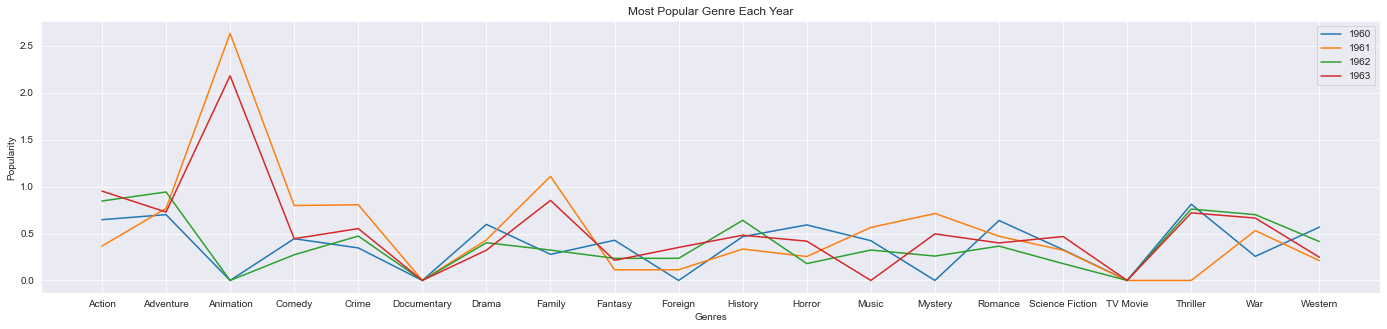

next [Y/N] : y


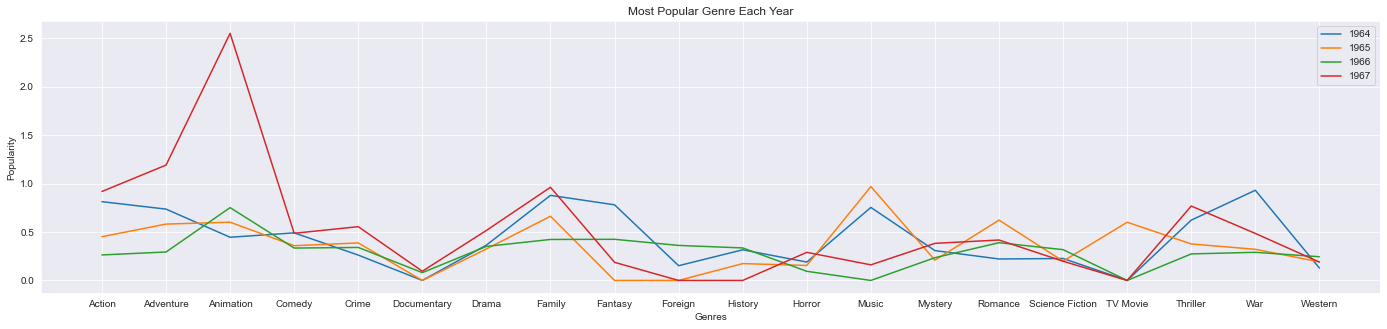

next [Y/N] : n


In [11]:
count=1

for year in years_unique:
    year_data = mean_genre['popularity'].loc[year]

    for genre in genres_unique:
        if genre not in year_data:
            year_data.loc[genre] = 0

    year_data.sort_index(inplace=True)
    year_data.plot(figsize=(24, 5), label=year)
    
    if count % 4 == 0:
        plt.xlabel('Genres')
        plt.ylabel('Popularity')
        plt.title('Most Popular Genre Each Year')
        plt.xticks(range(len(genres_unique)), genres_unique)
        plt.legend()    
        plt.show()

        contine_choice=input('next [Y/N] : ').strip().lower()
        if contine_choice !='y':
            break 
        
    count += 1

### Q2.What Keywords does people love about movies ?

To answer that question we are going to generate a word cloud image with the keywords in the high popular movies<br>
<strong style='color:red'>IMPORTANT : Install the wordcloud library if not installed using `pip install wordcloud` in the console</strong><br>
First we filter the data by the popularity having more than the average value<br>
Then calling `.copy()` of the it to not make any changes to the original data frame<br>
We use on the keywords column `.str.split()` to specify the string inside each row then splitting the text into a list to then create multiple rows out of it<br>
`.explode()` to create multiple rows out of a row with the list inside the column specified<br>
Calling `.head()` method to check if it was successful<br>

In [12]:
df_keywords = df[df['popularity'] >= df['popularity'].mean()].copy()
df_keywords['keywords'] = df_keywords['keywords'].str.split('|')
df_keywords = df_keywords.explode('keywords')
df_keywords.head()


,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,dna,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,tyrannosaurus rex,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,velociraptor,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


First import the WordCloud class from the wordcloud module <br>
Creating a new instance from the `WordCloud` class <br>
Then calling `.generate()` method to generate an image with the text provided as the words separated by space that's why we used `' '.join()` on the keywords<br>
`axis('off')` function to disable showing the axis <br>
`imshow()` function to show the wordcloud image generated <br>

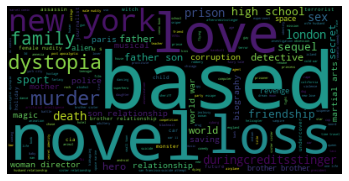

In [13]:
from wordcloud import WordCloud
wc_image=WordCloud().generate(' '.join(df_keywords['keywords']))
plt.axis('off')
plt.imshow(wc_image);

### Q3.What kinds of properties are associated with movies that have high revenues ?

To answer this question we are going to generate a scatter matrix and note what have a correlation with the revenues<br>
First we filter the data by the `revenue_adj` having more than the average value <br>
Then calling `.copy()` of the it to not make any changes to the original data frame<br>
`.drop()` method to delete columns we are not going to use with providing the names of the columns and `inplace=True` to change the object data<br>
`.rename()` method to remove the _adj in budget and revenue and `inplace=True` to change the object data<br>
`scatter_matrix()` function to generate the scatter matrix with the data provided and `figsize` to make it bigger <br>

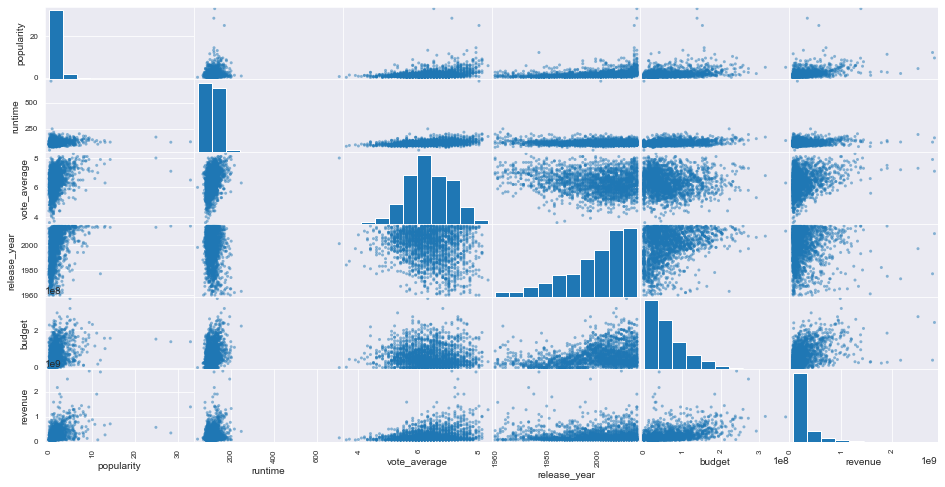

In [14]:
df_high_revenue = df[df['revenue_adj'] >= df['revenue_adj'].mean()].copy()
df_high_revenue.drop(columns=['vote_count','budget','revenue'],inplace=True)
df_high_revenue.rename(columns={
    'budget_adj':'budget',
    'revenue_adj':'revenue'
},inplace=True)
pd.plotting.scatter_matrix(df_high_revenue,figsize=(16,8));

We can see that the vote_average ,release_year and budget associated with the revenue with positive correlation<br>

<a id='conclusions'></a>
## Conclusions

We have cleaned the data and went through the questions <br>
Discovering the genres popularity's changing over the years <br>
What does people love about movies <br>
How to find what properties corelate with high revenue<br>
### Limitations
We couldn't find who is the most paid actor because no fees column available<br>
We could't find who is the best actor for each genre <br>
We couldn't predict what genre will be famous the next year <br>